<a href="https://colab.research.google.com/github/Elpastore/WENETAM_VECTOR_GENOMICS_TRAINING_WORKSHOP/blob/main/Vector_genomic_analyis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧬 Practical Session: Vector Genomic Data Analysis in the Context of Vector Control

**Environment**: Google Colab  
**Objective**: This session focuses on the analysis of vector genomic data to support vector control strategies.

---

## 📌 Goals

This practical aims to:

1. **Analyze vector genomic data** within the Google Colab environment.
2. **Detect insecticide resistance mutations**  
   Identify known genetic mutations associated with resistance to insecticides.
3. **Understand population genetic structure**  
   Explore how vector populations are genetically differentiated or connected across geographic regions.
4. **Identify genomic regions under selection**  
   Highlight parts of the genome that may be evolving in response to selective pressures such as insecticide use or environmental factors.

---

## 🧑‍🔬 Context

Vector-borne diseases remain a major public health issue. Understanding the genetic structure and evolutionary dynamics of vector populations (e.g., *Anopheles* mosquitoes) is crucial for:

- Tracking the spread of resistance mutations
- Informing effective insecticide deployment
- Designing sustainable vector control strategies

Through this hands-on session, you will gain experience in:

- Genomic data manipulation
- Population genetics analysis
- Interpreting key results relevant to vector control programs

# 🧬 Vector Genomic Data Analysis Workflow

This notebook guides the analysis of vector genomic data with a focus on understanding **population structure**, **insecticide resistance**, **genetic diversity**, and **selection signals**, in support of **vector control** strategies.

---

## 📚 Outline of the Analysis Plan

### 1. 🧾 Access to Metadata
- Load and explore sample metadata (location, species, collection date, etc.)

### 2. 🗺️ Draw Map
- Visualize sample collection locations
- Map distributions of key genotypes or variants

### 3. 🦟 Insecticide Resistance (IR)
#### - SNP Frequencies
- Analyze allele frequencies for known resistance-associated SNPs (e.g., Vgsc 995F, Ace-1)
  

## 💡 Notes
- Analyses will be performed using mainly `malariagen_data`, `scikit-allel`, `pandas`, `matplotlib`, and other population genomics libraries.
- Each step includes both **computation and interpretation**, with visual outputs where relevant.
- All code will run in a cloud-based environment (Google Colab) with options to extend using Google Drive or GitHub.

---



# 🧬 Vector Genomic Data Analysis in the Context of Vector Control

# --- Section 1: 🧾 Accessing and exploring Anopheles genomic data ---


## Where do the data come from?
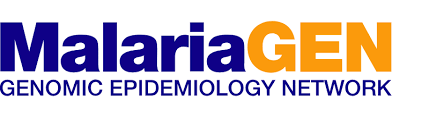

* The data we'll be analysing in this training course where generated by multiple research groups collaborating as part of the Malaria Genomic Epidemiology Network ([MalariaGEN](https://www.malariagen.net)).

* MalariaGEN is a collaborative programme providing access to genome sequencing and data processing services to support surveillance of malaria parasites and vectors.

* Through this programme, members of research groups and disease control programmes in malaria-endemic countries work in partnership with the Wellcome Sanger Institute.

* The basic workflow involves collecting mosquitoes, shipping them to sequencing facilities, preparing DNA samples and performing Illumina whole-genome sequencing, then processing the resulting data so they are ready for analysis, as shown below.


## Where are the data stored?

* To make accessing these data as simple as possible, the resulting data are stored in Google Cloud using a service called Google Cloud Storage (GCS). These data can then be downloaded to any computer, or can be analysed within the cloud using cloud computing services like Google colab.

* If you are using colab to access and analyses these data, then you don't need to download any data to your own computer or install any special software. You access colab through a web browser, and the code you run is executed on a different computer (a "virtual machine") which sits alongside the data in Google Cloud.


In [ ]:
%%html
<img width="60%" height="60%" src="https://vobs-resources.cog.sanger.ac.uk/training/img/workshop-1/w1m2-3.png"/>

## What types of analysis-ready genomic data are available?

* When DNA is passed from one generation of mosquitoes to the next, it undergoes **mutations**, which are errors in the DNA copying process. There are different types of mutations that can occur. These include:

  * **Single Nucleotide Polymorphisms (SNPs)** - substitutions of a single letter in the DNA sequence

  * **Copy Number Variants (CNVs)** - duplications or deletions of sections of a DNA sequence




* Different variant calling pipelines are used to identify these different types of mutations.

* It is also very useful to know whether combinations of mutations occur together in the same DNA sequence. In order to reconstruct this information, another pipeline is used to produce **phased haplotypes**.

* To help make sense of the genomic data, we also need some data about the mosquitoes which were sequenced, such as the time and place of collection. This data is known as **sample metadata**.


In [ ]:
%%html
<img width="80%" height="80%" src="https://vobs-resources.cog.sanger.ac.uk/training/img/workshop-1/w1m2-2.png"/>

**Install and import required tools and packages**

In [ ]:
%pip install -q --no-warn-conflicts malariagen_data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 24.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.7/71.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 775.9/775.9 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.9/25.9 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.3/211.3 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 98.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 

In [ ]:
import plotly.io as pio
pio.renderers.default = "notebook+colab"
import plotly.express as px
import malariagen_data
import pandas as pd

In [ ]:
# @title Default title text
ag3 = malariagen_data.Ag3()
ag3

<MalariaGEN Ag3 API client>
Storage URL             : gs://vo_agam_release_master_us_central1/
Data releases available : 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 3.10, 3.11, 3.12, 3.13, 3.14
Results cache           : None
Cohorts analysis        : 20250502
AIM analysis            : 20220528
Site filters analysis   : dt_20200416
Software version        : malariagen_data 15.2.2
Client location         : Oregon, United States (Google Cloud us-west1)
---
Please note that data are subject to terms of use,
for more information see https://www.malariagen.net/data
or contact support@malariagen.net. For API documentation see 
https://malariagen.github.io/malariagen-data-python/v15.2.2/Ag3.html

## Loading sample metadata

We can use the [`sample_metadata()`](https://malariagen.github.io/malariagen-data-python/latest/Ag3.html#sample-metadata-access) function to retrieve a pandas DataFrame containing metadata about all 3,081 samples in the Ag3.0 resource. In this DataFrame, each row represents one mosquito sample, and the columns such as `country` and `year` provide information about where the mosquito was originally collected.

In [ ]:
ag3.sample_metadata?

In [ ]:
df_samples = ag3.sample_metadata(sample_sets="3.0")
df_samples

,sample_id,partner_sample_id,contributor,country,location,year,month,latitude,longitude,sex_call,...,admin1_name,admin1_iso,admin2_name,taxon,cohort_admin1_year,cohort_admin1_month,cohort_admin1_quarter,cohort_admin2_year,cohort_admin2_month,cohort_admin2_quarter
0,AR0047-C,LUA047,Joao Pinto,Angola,Luanda,2009,4,-8.884,13.302,F,...,Luanda,AO-LUA,Luanda,coluzzii,AO-LUA_colu_2009,AO-LUA_colu_2009_04,AO-LUA_colu_2009_Q2,AO-LUA_Luanda_colu_2009,AO-LUA_Luanda_colu_2009_04,AO-LUA_Luanda_colu_2009_Q2
1,AR0049-C,LUA049,Joao Pinto,Angola,Luanda,2009,4,-8.884,13.302,F,...,Luanda,AO-LUA,Luanda,coluzzii,AO-LUA_colu_2009,AO-LUA_colu_2009_04,AO-LUA_colu_2009_Q2,AO-LUA_Luanda_colu_2009,AO-LUA_Luanda_colu_2009_04,AO-LUA_Luanda_colu_2009_Q2
2,AR0051-C,LUA051,Joao Pinto,Angola,Luanda,2009,4,-8.884,13.302,F,...,Luanda,AO-LUA,Luanda,coluzzii,AO-LUA_colu_2009,AO-LUA_colu_2009_04,AO-LUA_colu_2009_Q2,AO-LUA_Luanda_colu_2009,AO-LUA_Luanda_colu_2009_04,AO-LUA_Luanda_colu_2009_Q2
3,AR0061-C,LUA061,Joao Pinto,Angola,Luanda,2009,4,-8.884,13.302,F,...,Luanda,AO-LUA,Luanda,coluzzii,AO-LUA_colu_2009,AO-LUA_colu_2009_04,AO-LUA_colu_2009_Q2,AO-LUA_Luanda_colu_2009,AO-LUA_Luanda_colu_2009_04,AO-LUA_Luanda_colu_2009_Q2
4,AR0078-C,LUA078,Joao Pinto,Angola,Luanda,2009,4,-8.884,13.302,F,...,Luanda,AO-LUA,Luanda,coluzzii,AO-LUA_colu_2009,AO-LUA_colu_2009_04,AO-LUA_colu_2009_Q2,AO-LUA_Luanda_colu_2009,AO-LUA_Luanda_colu_2009_04,AO-LUA_Luanda_colu_2009_Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3076,AD0494-C,80-2-o-16,Martin Donnelly,Lab Cross,LSTM,-1,-1,53.409,-2.969,F,...,NaN,NaN,NaN,unassigned,NaN,NaN,NaN,NaN,NaN,NaN
3077,AD0495-C,80-2-o-17,Martin Donnelly,Lab Cross,LSTM,-1,-1,53.409,-2.969,M,...,NaN,NaN,NaN,unassigned,NaN,NaN,NaN,NaN,NaN,NaN
3078,AD0496-C,80-2-o-18,Martin Donnelly,Lab Cross,LSTM,-1,-1,53.409,-2.969,M,...,NaN,NaN,NaN,unassigned,NaN,NaN,NaN,NaN,NaN,NaN
3079,AD0497-C,80-2-o-19,Martin Donnelly,Lab Cross,LSTM,-1,-1,53.409,-2.969,F,...,NaN,NaN,NaN,unassigned,NaN,NaN,NaN,NaN,NaN,NaN


## Exploring sample metadata

Let's use some pandas features such as [`groupby()`](https://pandas.pydata.org/docs/user_guide/groupby.html) and [`query()`](https://pandas.pydata.org/docs/user_guide/indexing.html#the-query-method) to explore the sample metadata.

For example, let's first find out a bit more information about the different countries represented.

In [ ]:
df_samples.groupby("country").size()

,0
country,
Angola,81
Burkina Faso,296
Cameroon,444
Central African Republic,73
Cote d'Ivoire,80
Democratic Republic of the Congo,76
Equatorial Guinea,10
Gabon,69
"Gambia, The",279


We can then use the pandas query() function to select all samples from a given country. E.g., find all samples from Burkina Faso.

In [ ]:
df_samples.query("country == 'Burkina Faso'")

,sample_id,partner_sample_id,contributor,country,location,year,month,latitude,longitude,sex_call,...,admin1_name,admin1_iso,admin2_name,taxon,cohort_admin1_year,cohort_admin1_month,cohort_admin1_quarter,cohort_admin2_year,cohort_admin2_month,cohort_admin2_quarter
81,AB0085-Cx,BF2-4,Austin Burt,Burkina Faso,Pala,2012,7,11.151,-4.235,F,...,Hauts-Bassins,BF-09,Houet,gambiae,BF-09_gamb_2012,BF-09_gamb_2012_07,BF-09_gamb_2012_Q3,BF-09_Houet_gamb_2012,BF-09_Houet_gamb_2012_07,BF-09_Houet_gamb_2012_Q3
82,AB0086-Cx,BF2-6,Austin Burt,Burkina Faso,Pala,2012,7,11.151,-4.235,F,...,Hauts-Bassins,BF-09,Houet,gambiae,BF-09_gamb_2012,BF-09_gamb_2012_07,BF-09_gamb_2012_Q3,BF-09_Houet_gamb_2012,BF-09_Houet_gamb_2012_07,BF-09_Houet_gamb_2012_Q3
83,AB0087-C,BF3-3,Austin Burt,Burkina Faso,Bana Village,2012,7,11.233,-4.472,F,...,Hauts-Bassins,BF-09,Houet,coluzzii,BF-09_colu_2012,BF-09_colu_2012_07,BF-09_colu_2012_Q3,BF-09_Houet_colu_2012,BF-09_Houet_colu_2012_07,BF-09_Houet_colu_2012_Q3
84,AB0088-C,BF3-5,Austin Burt,Burkina Faso,Bana Village,2012,7,11.233,-4.472,F,...,Hauts-Bassins,BF-09,Houet,coluzzii,BF-09_colu_2012,BF-09_colu_2012_07,BF-09_colu_2012_Q3,BF-09_Houet_colu_2012,BF-09_Houet_colu_2012_07,BF-09_Houet_colu_2012_Q3
85,AB0089-Cx,BF3-8,Austin Burt,Burkina Faso,Bana Village,2012,7,11.233,-4.472,F,...,Hauts-Bassins,BF-09,Houet,coluzzii,BF-09_colu_2012,BF-09_colu_2012_07,BF-09_colu_2012_Q3,BF-09_Houet_colu_2012,BF-09_Houet_colu_2012_07,BF-09_Houet_colu_2012_Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,AB0314-C,6775,Nora Besansky,Burkina Faso,Monomtenga,2004,8,12.060,-1.170,F,...,Centre-Sud,BF-07,Bazega,gambiae,BF-07_gamb_2004,BF-07_gamb_2004_08,BF-07_gamb_2004_Q3,BF-07_Bazega_gamb_2004,BF-07_Bazega_gamb_2004_08,BF-07_Bazega_gamb_2004_Q3
373,AB0315-C,6777,Nora Besansky,Burkina Faso,Monomtenga,2004,8,12.060,-1.170,F,...,Centre-Sud,BF-07,Bazega,gambiae,BF-07_gamb_2004,BF-07_gamb_2004_08,BF-07_gamb_2004_Q3,BF-07_Bazega_gamb_2004,BF-07_Bazega_gamb_2004_08,BF-07_Bazega_gamb_2004_Q3
374,AB0316-C,6779,Nora Besansky,Burkina Faso,Monomtenga,2004,8,12.060,-1.170,F,...,Centre-Sud,BF-07,Bazega,gambiae,BF-07_gamb_2004,BF-07_gamb_2004_08,BF-07_gamb_2004_Q3,BF-07_Bazega_gamb_2004,BF-07_Bazega_gamb_2004_08,BF-07_Bazega_gamb_2004_Q3
375,AB0318-C,5072,Nora Besansky,Burkina Faso,Monomtenga,2004,7,12.060,-1.170,F,...,Centre-Sud,BF-07,Bazega,gambiae,BF-07_gamb_2004,BF-07_gamb_2004_07,BF-07_gamb_2004_Q3,BF-07_Bazega_gamb_2004,BF-07_Bazega_gamb_2004_07,BF-07_Bazega_gamb_2004_Q3


From a quick glance at the preview above, we can see there are samples collected in different years. Let's summarise that.

In [ ]:
df_samples.query("country == 'Burkina Faso'").groupby("year").size()

,0
year,
2004,13
2012,181
2014,102


If we wanted to now inspect the samples collected from Burkina Faso in 2014, we could combine these conditions in a query.

In [ ]:
df_samples.query("country == 'Burkina Faso' and year == 2014")

,sample_id,partner_sample_id,contributor,country,location,year,month,latitude,longitude,sex_call,...,admin1_name,admin1_iso,admin2_name,taxon,cohort_admin1_year,cohort_admin1_month,cohort_admin1_quarter,cohort_admin2_year,cohort_admin2_month,cohort_admin2_quarter
262,AB0326-C,BF18-1,Austin Burt,Burkina Faso,Bana Village,2014,7,11.233,-4.472,F,...,Hauts-Bassins,BF-09,Houet,coluzzii,BF-09_colu_2014,BF-09_colu_2014_07,BF-09_colu_2014_Q3,BF-09_Houet_colu_2014,BF-09_Houet_colu_2014_07,BF-09_Houet_colu_2014_Q3
263,AB0327-C,BF18-3,Austin Burt,Burkina Faso,Bana Village,2014,7,11.233,-4.472,F,...,Hauts-Bassins,BF-09,Houet,coluzzii,BF-09_colu_2014,BF-09_colu_2014_07,BF-09_colu_2014_Q3,BF-09_Houet_colu_2014,BF-09_Houet_colu_2014_07,BF-09_Houet_colu_2014_Q3
264,AB0328-C,BF18-4,Austin Burt,Burkina Faso,Bana Village,2014,7,11.233,-4.472,F,...,Hauts-Bassins,BF-09,Houet,coluzzii,BF-09_colu_2014,BF-09_colu_2014_07,BF-09_colu_2014_Q3,BF-09_Houet_colu_2014,BF-09_Houet_colu_2014_07,BF-09_Houet_colu_2014_Q3
265,AB0329-C,BF18-5,Austin Burt,Burkina Faso,Bana Village,2014,7,11.233,-4.472,F,...,Hauts-Bassins,BF-09,Houet,coluzzii,BF-09_colu_2014,BF-09_colu_2014_07,BF-09_colu_2014_Q3,BF-09_Houet_colu_2014,BF-09_Houet_colu_2014_07,BF-09_Houet_colu_2014_Q3
266,AB0330-C,BF18-6,Austin Burt,Burkina Faso,Bana Village,2014,7,11.233,-4.472,F,...,Hauts-Bassins,BF-09,Houet,coluzzii,BF-09_colu_2014,BF-09_colu_2014_07,BF-09_colu_2014_Q3,BF-09_Houet_colu_2014,BF-09_Houet_colu_2014_07,BF-09_Houet_colu_2014_Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,AB0533-C,BF13-18,Austin Burt,Burkina Faso,Souroukoudinga,2014,7,11.238,-4.235,F,...,Hauts-Bassins,BF-09,Houet,gambiae,BF-09_gamb_2014,BF-09_gamb_2014_07,BF-09_gamb_2014_Q3,BF-09_Houet_gamb_2014,BF-09_Houet_gamb_2014_07,BF-09_Houet_gamb_2014_Q3
360,AB0536-C,BF13-31,Austin Burt,Burkina Faso,Souroukoudinga,2014,7,11.238,-4.235,F,...,Hauts-Bassins,BF-09,Houet,gambiae,BF-09_gamb_2014,BF-09_gamb_2014_07,BF-09_gamb_2014_Q3,BF-09_Houet_gamb_2014,BF-09_Houet_gamb_2014_07,BF-09_Houet_gamb_2014_Q3
361,AB0537-C,BF13-32,Austin Burt,Burkina Faso,Souroukoudinga,2014,7,11.238,-4.235,F,...,Hauts-Bassins,BF-09,Houet,gambiae,BF-09_gamb_2014,BF-09_gamb_2014_07,BF-09_gamb_2014_Q3,BF-09_Houet_gamb_2014,BF-09_Houet_gamb_2014_07,BF-09_Houet_gamb_2014_Q3
362,AB0538-C,BF13-33,Austin Burt,Burkina Faso,Souroukoudinga,2014,7,11.238,-4.235,F,...,Hauts-Bassins,BF-09,Houet,gambiae,BF-09_gamb_2014,BF-09_gamb_2014_07,BF-09_gamb_2014_Q3,BF-09_Houet_gamb_2014,BF-09_Houet_gamb_2014_07,BF-09_Houet_gamb_2014_Q3


Finally, let's break this down by mosquito species.

In [ ]:
df_samples.query("country == 'Burkina Faso' and year == 2014").groupby("taxon").size()

,0
taxon,
arabiensis,3
coluzzii,53
gambiae,46


## Summarising sample metadata with pivot tables

In the examples above we explored a part of the sample metadata, but it can also be useful to get an overall summary of how many samples have been sequenced, broken down by time and place of collection and mosquito species. For that kind of summary the [`pivot_table()`](https://pandas.pydata.org/docs/user_guide/reshaping.html#pivot-tables) function is useful.

Let's start by summarising the number of mosquitoes by country and species (taxon).

In [ ]:
pivot_country_taxon = (
    df_samples
    .pivot_table(
        index="country",
        columns="taxon",
        values="sample_id",
        aggfunc="count",
        fill_value=0
    )
)
pivot_country_taxon

taxon,arabiensis,bissau,coluzzii,gambiae,gcx3,unassigned
country,,,,,,
Angola,0,0,81,0,0,0
Burkina Faso,3,0,135,158,0,0
Cameroon,2,0,26,416,0,0
Central African Republic,0,0,18,55,0,0
Cote d'Ivoire,0,0,80,0,0,0
Democratic Republic of the Congo,0,0,0,76,0,0
Equatorial Guinea,0,0,0,10,0,0
Gabon,0,0,0,69,0,0
"Gambia, The",0,77,200,2,0,0


**A** useful function called [count_samples](https://malariagen.github.io/malariagen-data-python/latest/generated/malariagen_data.ag3.Ag3.count_samples.html#malariagen_data.ag3.Ag3.count_samples) which create a pivot table showing numbers of samples available by space, time and taxon.

In [ ]:
pivot_location_taxon_2 = ag3.count_samples(
    sample_sets="3.0",
    #sample_query = "country == 'Burkina Faso'",
    index = ["country", "location", "latitude", "longitude"],
    #index = ["country", "admin1_name", "admin2_name", "location", "year"],
    columns = ["taxon"],

)
pivot_location_taxon_2

taxon                                           arabiensis  coluzzii  gambiae
country      location       latitude longitude                               
Burkina Faso Bana Village   11.233   -4.472              1        89       38
             Monomtenga     12.060   -1.170              0         0       13
             Pala           11.151   -4.235              2        11       64
             Souroukoudinga 11.238   -4.235              0        35       43

## Plotting maps of sampling locations

To explore the different mosquito collection locations it can also be useful to plot some maps. You can plot maps within a notebook using various packages such as [ipyleaflet](https://ipyleaflet.readthedocs.io/en/latest/). Let's install the ipyleaflet package.

In [ ]:
%pip install -qq ipyleaflet

In [ ]:
import ipyleaflet
m = ipyleaflet.Map(
    basemap=ipyleaflet.basemaps.OpenStreetMap.Mapnik,
    center=[0, 20],
    zoom=3,

)
m

Map(center=[0, 20], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

Let's now plot a map, adding in markers for all of the locations where we have mosquitoes. First create a pivot table with the location data we need.

In [ ]:
pivot_location_taxon = (
    df_samples.query("country == 'Burkina Faso'")
    .pivot_table(
        index=["country", "location", "latitude", "longitude"],
        columns=["taxon"],
        values="sample_id",
        aggfunc="count",
        fill_value=0,
    )
)

pivot_location_taxon

taxon                                           arabiensis  coluzzii  gambiae
country      location       latitude longitude                               
Burkina Faso Bana Village   11.233   -4.472              1        89       38
             Monomtenga     12.060   -1.170              0         0       13
             Pala           11.151   -4.235              2        11       64
             Souroukoudinga 11.238   -4.235              0        35       43

Now create a map with markers.

In [ ]:
# create a map
m = ipyleaflet.Map(
    basemap=ipyleaflet.basemaps.OpenStreetMap.Mapnik,
    center=[0, 20],
    zoom=3,
)

# add markers for sampling locations
for row in pivot_location_taxon.reset_index().itertuples():
    title = (
        f"{row.location}, {row.country} ({row.latitude:.3f}, {row.longitude:.3f})\n"
        f"{row.gambiae} gambiae, {row.coluzzii} coluzzii, {row.arabiensis} arabiensis" # This line should be define according to taxon available
    )
    marker = ipyleaflet.Marker(
        location=(row.latitude, row.longitude),
        draggable=False,
        title=title,
    )
    m.add_layer(marker)

# add a scale bar
m.add_control(ipyleaflet.ScaleControl(position="bottomleft"))

# display the map
m

Map(center=[0, 20], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

The [plot_samples_interactive_map](https://malariagen.github.io/malariagen-data-python/latest/generated/malariagen_data.ag3.Ag3.plot_samples_interactive_map.html#malariagen_data.ag3.Ag3.plot_samples_interactive_map) is a simple way to draw a map directly by querying our data_set from malariagen_data cloud

> Add blockquote



In [ ]:
ag3.plot_samples_interactive_map(
    sample_sets = "3.0",
    sample_query = "country == 'Burkina Faso'",
    count_by = "taxon"
)

Map(center=[-2, 20], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…

The [plot_sample_location_mapbox](https://malariagen.github.io/malariagen-data-python/latest/generated/malariagen_data.ag3.Ag3.plot_sample_location_mapbox.html#malariagen_data.ag3.Ag3.plot_sample_location_mapbox) plots markers on a map showing sample locations

In [ ]:
ag3.plot_sample_location_mapbox(
    sample_sets= "3.0",
    sample_query = "country== 'Gambia, The'",
)

So here we were trying to plot markers on a map showing sample based on taxon. We are free to choose how to plot marker by using the right columns.

In [ ]:

# Get the sample metadata.
sample_sets = '3.0'
sample_query = 'country == "Gambia, The"'
df_samples_gambia = ag3.sample_metadata(sample_sets=sample_sets, sample_query=sample_query)


# Compute the center of the map
center_lat = df_samples_gambia['latitude'].mean()
center_lon = df_samples_gambia['longitude'].mean()

# Create the map
fig = px.scatter_mapbox(
    df_samples_gambia,
    lat="latitude",
    lon="longitude",
    color = "taxon",
    mapbox_style="open-street-map",
    #zoom=9,
    center={"lat": center_lat, "lon": center_lon},
    hover_name="location",  # Optional
    hover_data=["admin1_name", "admin2_name", "taxon"],
)
fig.update_traces(marker=dict(size=12))  # You can adjust size here (e.g., 10–20)

fig.show()

## 🧪 Exercise: Explore Taxon Distribution in Gambia

In this exercise, you will explore vector samples collected from **Gambia**, generate summaries of taxon distributions over time, and visualize specific patterns related to the **Coluzzii** taxon.

---

### 🎯 Objectives

- Access genomic metadata for samples from Gambia
- Summarize the number of samples collected per taxon and year
- Visualize the spatial distribution of **Coluzzii** samples collected after 2015

---

### 📥 Step 1: Load and Filter Gambia Data

Filter the dataset to include only samples collected in **Gambia**. Preview the first few rows to check the available columns.

---

### 📊 Step 2: Summarize Taxon by Year

Group the data by `year` and `taxon` to generate a summary table showing how many samples of each taxon were collected annually.

---

### 🐜 Step 3: Plot Coluzzii Samples (Post-2015)

Subset the data to include only **Coluzzii** samples collected **after 2015**. Generate an interactive map showing their geographic distribution using `folium`.

---

### ✅ Expected Output

- A summary table of taxon counts by year for Gambia
- A clean, interactive map displaying the spatial spread of **Coluzzii** samples post-2015

---

💡 *Tip: Try changing the year threshold or filtering for a different taxon to explore additional patterns!*


#🧪 Section 2: Insecticide Resistance

Understanding insecticide resistance (IR) is critical for effective vector control. In this section, we will focus on analyzing genetic variants known to confer resistance to common insecticides.

---

### 🎯 Objectives

- Load and explore SNPs associated with insecticide resistance
- Calculate allele/genotype frequencies across populations or regions
- Visualize resistance SNP using heatmap
- (Optional) Explore geographical distribution of key resistance variants

---

### 🧬 Common Resistance Markers

Some of the most well-known mutations linked to IR include:

- **Vgsc (Voltage-gated sodium channel)** – e.g. L995F, L995S (kdr mutations)
- **Ace1 (Acetylcholinesterase 1)** – e.g. G280S
- **Cyp6/8 families** – copy number variants (CNVs) related to metabolic resistance

---

### 📈 Steps Overview

1. Load the SNP/genotype dataset
2. Summarize and compute allele/genotype frequencies
3. Visualize SNP frequencies per population/region
4. *(Optional)* Plot geographical distribution of resistance SNPs

---

### ✅ Expected Outcomes

- Frequency table of resistance SNPs across genotypes and populations
- Heatmap of SNP frequencies
- *(Optional)* Interactive map showing spatial patterns of resistance variants

---

💡 *Tip: You can compare frequencies by year or region to assess how resistance evolves over time and space.*


To discover SNPs and compute allele frequencies, we're going to use the [`snp_allele_frequencies()` function](https://malariagen.github.io/malariagen-data-python/latest/generated/malariagen_data.ag3.Ag3.snp_allele_frequencies.html#malariagen_data.ag3.Ag3.snp_allele_frequencies). Let's have a look at the documentation for this function.


In [ ]:
ag3.snp_allele_frequencies?

We can access the annotation of the reference genome as a [pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html) using [`genome_features() function`](https://malariagen.github.io/malariagen-data-python/latest/generated/malariagen_data.ag3.Ag3.genome_features.html#malariagen_data.ag3.Ag3.genome_features)

In [ ]:
ag3.genome_features?

In [ ]:
df_genome_features = ag3.genome_features().set_index("ID")
df_genome_features.query('Name=="para"') #AGAP004707

,contig,source,type,start,end,score,strand,phase,Parent,Name,description
ID,,,,,,,,,,,
AGAP004707,2L,VectorBase,gene,2358158,2431617,NaN,+,NaN,NaN,para,voltage-gated sodium channel [Source:VB Commun...


In [ ]:
df_genome_features.query('Parent=="AGAP004707"')

,contig,source,type,start,end,score,strand,phase,Parent,Name,description
ID,,,,,,,,,,,
AGAP004707-RA,2L,VectorBase,mRNA,2358158,2431617,NaN,+,NaN,AGAP004707,NaN,NaN
AGAP004707-RB,2L,VectorBase,mRNA,2358158,2431617,NaN,+,NaN,AGAP004707,NaN,NaN
AGAP004707-RC,2L,VectorBase,mRNA,2358158,2431617,NaN,+,NaN,AGAP004707,NaN,NaN
AGAP004707-RD,2L,VectorBase,mRNA,2358158,2431617,NaN,+,NaN,AGAP004707,NaN,NaN
AGAP004707-RE,2L,VectorBase,mRNA,2358158,2431617,NaN,+,NaN,AGAP004707,NaN,NaN
AGAP004707-RF,2L,VectorBase,mRNA,2358158,2431617,NaN,+,NaN,AGAP004707,NaN,NaN
AGAP004707-RG,2L,VectorBase,mRNA,2358158,2431617,NaN,+,NaN,AGAP004707,NaN,NaN
AGAP004707-RH,2L,VectorBase,mRNA,2358158,2431617,NaN,+,NaN,AGAP004707,NaN,NaN
AGAP004707-RI,2L,VectorBase,mRNA,2358158,2431617,NaN,+,NaN,AGAP004707,NaN,NaN


To discover SNPs in the *Vgsc* gene, we need to define some parameters.

First, we need to decide which gene transcript to use when determining what SNP effects will be. Here we'll use the transcript with identifier "AGAP004707-RD".

In [ ]:
transcript = "AGAP004707-RD"

Next, to compute allele frequencies, we need to decide how our mosquitoes will be grouped into cohorts. There are different ways you can do this, for this analysis we'll group spatially by level 1 administrative divisions within countries, and temporally by year.

In [ ]:
cohorts = "admin1_year"

Next, we need to choose which samples to analyse. There are a number of different sample sets in the Ag3.0 data resource that we could use for this analysis. Let's check what's available.

In [ ]:
ag3.sample_sets(release="3.0")[['sample_set', 'study_id', 'sample_count']]

,sample_set,study_id,sample_count
0,AG1000G-AO,AG1000G-AO,81
1,AG1000G-BF-A,AG1000G-BF-1,181
2,AG1000G-BF-B,AG1000G-BF-1,102
3,AG1000G-BF-C,AG1000G-BF-2,13
4,AG1000G-CD,AG1000G-CD,76
5,AG1000G-CF,AG1000G-CF,73
6,AG1000G-CI,AG1000G-CI,80
7,AG1000G-CM-A,AG1000G-CM-1,303
8,AG1000G-CM-B,AG1000G-CM-2,97
9,AG1000G-CM-C,AG1000G-CM-3,44


In [ ]:
# Load metadata of bf_ag1000g_data_report
sets = ["1191-VO-MULTI-OLOUGHLIN-VMF00106", "1191-VO-MULTI-OLOUGHLIN-VMF00140",
             "AG1000G-BF-A", "AG1000G-BF-B", "AG1000G-BF-C"]
df_samples = ag3.sample_metadata(sample_sets=sets, sample_query="country=='Burkina Faso'")

To keep things simple, for this part we'll focus on mosquitoes from Burkina Faso. There are three sample sets in the Ag3.0 resource providing data on mosquitoes from Burkina Faso.

OK, now we're ready to run the analysis.

In [ ]:
snp_allele_freqs_df = ag3.snp_allele_frequencies(
    transcript=transcript,
    cohorts=cohorts,
    sample_sets=sets,
    drop_invariant=False,
)
snp_allele_freqs_df

Load SNP genotypes:   0%|          | 0/140 [00:00<?, ?it/s]

Compute allele frequencies:   0%|          | 0/18 [00:00<?, ?it/s]

Compute SNP effects:   0%|          | 0/209001 [00:00<?, ?it/s]

pass_gamb_colu_arab  \
contig position ref_allele alt_allele aa_change                        
2L     2358158  A          C          M1L                       True   
                           T          M1L                       True   
                           G          M1V                       True   
       2358159  T          A          M1K                       True   
                           C          M1T                       True   
...                                                              ...   
       2431616  G          C          *2119S                    True   
                           T          *2119L                    True   
       2431617  A          C          *2119C                    True   
                           T          *2119C                    True   
                           G          *2119W                    True   

                                                 pass_gamb_colu  pass_arab  \
contig position ref_allele alt_allele aa_change                              
2L     2358158  A          C          M1L                  True       True   
                           T          M1L                  True       True   
                           G          M1V                  True       True   
       2358159  T          A          M1K                  True       True   
                           C          M1T                  True       True   
...                                                         ...        ...   
       2431616  G          C          *2119S               True       True   
                           T          *2119L               True       True   
       2431617  A          C          *2119C               True       True   
                           T          *2119C               True       True   
                           G          *2119W               True       True   

                                                 frq_BF-07_gamb_2004  \
contig position ref_allele alt_allele aa_change                        
2L     2358158  A          C          M1L                        0.0   
                           T          M1L                        0.0   
                           G          M1V                        0.0   
       2358159  T          A          M1K                        0.0   
                           C          M1T                        0.0   
...                                                              ...   
       2431616  G          C          *2119S                     0.0   
                           T          *2119L                     0.0   
       2431617  A          C          *2119C                     0.0   
                           T          *2119C                     0.0   
                           G          *2119W                     0.0   

                                                 frq_BF-09_arab_2014  \
contig position ref_allele alt_allele aa_change                        
2L     2358158  A          C          M1L                        0.0   
                           T          M1L                        0.0   
                           G          M1V                        0.0   
       2358159  T          A          M1K                        0.0   
                           C          M1T                        0.0   
...                                                              ...   
       2431616  G          C          *2119S                     0.0   
                           T          *2119L                     0.0   
       2431617  A          C          *2119C                     0.0   
                           T          *2119C                     0.0   
                           G          *2119W                     0.0   

                                                 frq_BF-09_arab_2015  \
contig position ref_allele alt_allele aa_change                        
2L     2358158  A          C          M1L                        0.0   
       

The output from this function is a pandas DataFrame, where each row provides information about a SNP in the *Vgsc* gene.

Before we go further, to improve our understanding of what these data, let's look at some background.

## Grouping samples into cohorts

The MalariaGEN Ag3.0 data resource contain mosquito samples collected across large spatial and temporal scales, and from different mosquito species. When we want to run population genetic analyses on datasets like these, the data must be divided into biologically relevant **cohorts**, where a cohort is simply a group of samples we want to analyse together.

To help define cohorts and analyse these data, we have added some metadata for each sample about its time and place of collection and its species:

- **Spatially** - For most analyses we use administrative divisions to group the samples into cohorts. These give two levels of spatial resolution, where admin level 1 divides each country into a few large regions, while admin level 2 provides finer scale divisions such as provinces.

- **Temporally** - For each sample we provide the year, quarter and month of collection. Depending on your analysis, you can choose to group samples by year, by year and by year quarter, or by year and by month, although note that for some samples the collection month is missing.

- **Taxonomically** - Ag3.0 contains samples from different species in the *Anopheles gambiae* complex. To help with grouping by taxon, we have included a "taxon" field in the sample metadata.
   
Using these three dimensions, we have pre-defined six **cohort sets**, each of which groups samples into cohorts at different levels of spatio-temporal resolution. Within all cohort sets, samples are further subdivided by taxon.

- **admin1_year** - Cohorts obtained by grouping samples by admin level 1, collection year and taxon.
- **admin1_quarter** - Cohorts obtained by grouping samples by admin level 1, collection year and quarter, and taxon.
- **admin1_month** - Cohorts obtained by grouping samples by admin level 1, collection year and month, and taxon.
- **admin2_year** - Cohorts obtained by grouping samples by admin level 2, collection year and taxon.
- **admin2_quarter** - Cohorts obtained by grouping samples by admin level 2, collection year and quarter, and taxon.
- **admin2_month** - Cohorts obtained by grouping samples by admin level 2, collection year and month, and taxon.

Remember above we chose to use the "admin1_year" cohorts for our *Vgsc* analysis.

## 🧬 Single Nucleotide Polymorphisms (SNPs)

Before we can understand genetic variation in mosquito populations, we need to compare individual genomes to a common standard — the reference genome. This comparison allows us to detect differences at specific points in the DNA, helping us identify genetic variants such as SNPs.

By aligning the DNA sequencing reads from a wild-caught mosquito to the reference genome, we can determine its genotype at every position.


---

### 🧬 What is a SNP?

The **genotype** tells us whether the individual is genetically similar or different from the reference at each **nucleotide position**.

- If a nucleotide **matches** the reference genome, we call it a **reference allele**.
- If a nucleotide **differs**, we call it an **alternative allele**.

The term **allele** simply refers to a version of a genetic variant at a particular locus. Since DNA consists of four nucleotides (A, T, C, G), and one of them is defined as the reference, up to **three alternative alleles** can exist at a single position.

When a genetic difference occurs at just **one single base pair** between individuals in a population, we call it a **Single Nucleotide Polymorphism** — or **SNP**.

---

### 🧪 Why SNPs Matter in Vector Genomics

In the context of vector control and insecticide resistance:

- SNPs can **disrupt target genes** (e.g. sodium channels) and confer **resistance to insecticides**.
- By comparing SNP frequencies between populations or time periods, we can track **evolutionary changes** and **selection pressures**.
- Some SNPs are **markers for cryptic species**, helping us distinguish *An. gambiae*, *An. coluzzii*, and other taxa.

In the next section, we’ll learn how to compute and visualize SNP **frequencies** in natural mosquito populations — a key step for identifying mutations under selection.


In [ ]:
%%html
<img width="60%" height="60%" src="https://vobs-resources.cog.sanger.ac.uk/training/img/workshop-1/w1m4-1.png"/>

This SNP information is displayed in the first four columns of the `snp_allele_frequencies()` index in the output dataframe. We can see each alternative allele represented by it's own row in our output. Let's take a look at just the index.

In [ ]:
snp_allele_freqs_df[[]]

Empty DataFrame
Columns: []
Index: [(2L, 2358158, A, C, M1L), (2L, 2358158, A, T, M1L), (2L, 2358158, A, G, M1V), (2L, 2358159, T, A, M1K), (2L, 2358159, T, C, M1T), (2L, 2358159, T, G, M1R), (2L, 2358160, G, A, M1I), (2L, 2358160, G, C, M1I), (2L, 2358160, G, T, M1I), (2L, 2358161, A, C, T2P), (2L, 2358161, A, T, T2S), (2L, 2358161, A, G, T2A), (2L, 2358162, C, A, T2N), (2L, 2358162, C, T, T2I), (2L, 2358162, C, G, T2S), (2L, 2358163, C, A, T2T), (2L, 2358163, C, T, T2T), (2L, 2358163, C, G, T2T), (2L, 2358164, G, A, E3K), (2L, 2358164, G, C, E3Q), (2L, 2358164, G, T, E3*), (2L, 2358165, A, C, E3A), (2L, 2358165, A, T, E3V), (2L, 2358165, A, G, E3G), (2L, 2358166, A, C, E3D), (2L, 2358166, A, T, E3D), (2L, 2358166, A, G, E3E), (2L, 2358167, G, A, D4N), (2L, 2358167, G, C, D4H), (2L, 2358167, G, T, D4Y), (2L, 2358168, A, C, D4A), (2L, 2358168, A, T, D4V), (2L, 2358168, A, G, D4G), (2L, 2358169, C, A, D4E), (2L, 2358169, C, T, D4D), (2L, 2358169, C, G, D4E), (2L, 2358170, T, A, S5T), (2L, 2358170, T, C, S5P), (2L, 2358170, T, G, S5A), (2L, 2358171, C, A, S5Y), (2L, 2358171, C, T, S5F), (2L, 2358171, C, G, S5C), (2L, 2358172, C, A, S5S), (2L, 2358172, C, T, S5S), (2L, 2358172, C, G, S5S), (2L, 2358173, G, A, D6N), (2L, 2358173, G, C, D6H), (2L, 2358173, G, T, D6Y), (2L, 2358174, A, C, D6A), (2L, 2358174, A, T, D6V), (2L, 2358174, A, G, D6G), (2L, 2358175, T, A, D6E), (2L, 2358175, T, C, D6D), (2L, 2358175, T, G, D6E), (2L, 2358176, T, A, S7T), (2L, 2358176, T, C, S7P), (2L, 2358176, T, G, S7A), (2L, 2358177, C, A, S7*), (2L, 2358177, C, T, S7L), (2L, 2358177, C, G, S7W), (2L, 2358178, G, A, S7S), (2L, 2358178, G, C, S7S), (2L, 2358178, G, T, S7S), (2L, 2358179, A, C, I8L), (2L, 2358179, A, T, I8L), (2L, 2358179, A, G, I8V), (2L, 2358180, T, A, I8K), (2L, 2358180, T, C, I8T), (2L, 2358180, T, G, I8R), (2L, 2358181, A, C, I8I), (2L, 2358181, A, T, I8I), (2L, 2358181, A, G, I8M), (2L, 2358182, T, A, S9T), (2L, 2358182, T, C, S9P), (2L, 2358182, T, G, S9A), (2L, 2358183, C, A, S9Y), (2L, 2358183, C, T, S9F), (2L, 2358183, C, G, S9C), (2L, 2358184, T, A, S9S), (2L, 2358184, T, C, S9S), (2L, 2358184, T, G, S9S), (2L, 2358185, G, A, E10K), (2L, 2358185, G, C, E10Q), (2L, 2358185, G, T, E10*), (2L, 2358186, A, C, E10A), (2L, 2358186, A, T, E10V), (2L, 2358186, A, G, E10G), (2L, 2358187, G, A, E10E), (2L, 2358187, G, C, E10D), (2L, 2358187, G, T, E10D), (2L, 2358188, G, A, E11K), (2L, 2358188, G, C, E11Q), (2L, 2358188, G, T, E11*), (2L, 2358189, A, C, E11A), (2L, 2358189, A, T, E11V), (2L, 2358189, A, G, E11G), (2L, 2358190, A, C, E11D), (2L, 2358190, A, T, E11D), (2L, 2358190, A, G, E11E), (2L, 2358191, G, A, E12K), ...]

[209001 rows x 0 columns]

## SNP effects - some SNPs may be more interesting than others

SNPs can have different effects depending on what the nucleotide change is and where in the genome it occurs.

In this analysis, we are interested in SNPs that affect protein structure, specifically those which will change the voltage-gated sodium-channel and could affect protein function and therefore insecticide resistance phenotype, so we need to look within the coding sequences (CDS) of the _Vgsc_ gene.

However, not all SNPs which fall in CDSs cause protein changes, because the genetic code has some redundancy, meaning that different nucleotide sequences can encode the same amino acid. If a SNP in a CDS does change the amino acid, it is called a **non-synonymous** (NS) or **missense** SNP, and if the SNP does not change the amino acid, it is called a **synonymous** SNP.  

Manually predicting SNP effects is quite involved, but `snp_allele_frequencies()` can predict them for us, let's look at how this is represented in our output DataFrame.


In [ ]:
snp_effects_df = snp_allele_freqs_df[["effect", "impact"]]
snp_effects_df

effect  \
contig position ref_allele alt_allele aa_change                          
2L     2358158  A          C          M1L                   START_LOST   
                           T          M1L                   START_LOST   
                           G          M1V                   START_LOST   
       2358159  T          A          M1K        NON_SYNONYMOUS_CODING   
                           C          M1T        NON_SYNONYMOUS_CODING   
...                                                                ...   
       2431616  G          C          *2119S                 STOP_LOST   
                           T          *2119L                 STOP_LOST   
       2431617  A          C          *2119C                 STOP_LOST   
                           T          *2119C                 STOP_LOST   
                           G          *2119W                 STOP_LOST   

                                                   impact  
contig position ref_allele alt_allele aa_change            
2L     2358158  A          C          M1L            HIGH  
                           T          M1L            HIGH  
                           G          M1V            HIGH  
       2358159  T          A          M1K        MODERATE  
                           C          M1T        MODERATE  
...                                                   ...  
       2431616  G          C          *2119S         HIGH  
                           T          *2119L         HIGH  
       2431617  A          C          *2119C         HIGH  
                           T          *2119C         HIGH  
                           G          *2119W         HIGH  

[209001 rows x 2 columns]

Let's look specifically at the genomic position where a SNP occurs which causes an insecticide-resistance mutation, also known as "kdr".

In [ ]:
snp_effects_df.loc[("2L", 2_422_652)]

effect    impact
ref_allele alt_allele aa_change                                 
A          C          L995F      NON_SYNONYMOUS_CODING  MODERATE
           T          L995F      NON_SYNONYMOUS_CODING  MODERATE
           G          L995L          SYNONYMOUS_CODING       LOW

For interest, let's count the number of SNPs we have by their effect.

In [ ]:
snp_allele_freqs_df.query("max_af > 0").groupby(["effect", "impact"]).size()

,,0
effect,impact,
INTRONIC,MODIFIER,36254
NON_SYNONYMOUS_CODING,MODERATE,1410
SPLICE_CORE,HIGH,56
SPLICE_REGION,MODERATE,101
STOP_GAINED,HIGH,104
STOP_LOST,HIGH,1
SYNONYMOUS_CODING,LOW,456


## SNP allele frequencies

Identifying the presence or absence of SNPs in wild caught mosquitoes is interesting, but the real value in generating SNP genotypes from large spatiotemporal collections of mosquitoes comes from the ability to see how groups of samples (cohorts) differ between geographical locations, species, and over time.  

One way to compare SNP differences between cohorts is to calculate and compare **SNP allele frequencies** at each position in the genome by dividing the number of times each SNP allele is found in the cohort by the total number of individuals present in the cohort (multiplied by 2 because each individual mosquito is diploid and so carries two genome copies).

In [ ]:
%%html
<img width="60%" height="60%" src="https://vobs-resources.cog.sanger.ac.uk/training/img/workshop-1/w1m4-2.png"/>

Let's take another look at the allele frequencies we computed above, focusing just on the frequency columns.

In [ ]:
frequency_columns = [
    col for col in snp_allele_freqs_df.columns
    if col.startswith("frq_")
]
frequency_columns

['frq_BF-07_gamb_2004',
 'frq_BF-09_arab_2014',
 'frq_BF-09_arab_2015',
 'frq_BF-09_arab_2016',
 'frq_BF-09_colu_2012',
 'frq_BF-09_colu_2014',
 'frq_BF-09_colu_2015',
 'frq_BF-09_colu_2016',
 'frq_BF-09_colu_2017',
 'frq_BF-09_gamb_2012',
 'frq_BF-09_gamb_2014',
 'frq_BF-09_gamb_2015',
 'frq_BF-09_gamb_2016',
 'frq_BF-09_gamb_2017',
 'frq_ML-2_colu_2014',
 'frq_ML-2_colu_2015',
 'frq_ML-2_gamb_2014',
 'frq_ML-2_gamb_2015']

In [ ]:
snp_allele_freqs_df[frequency_columns + ['max_af']]

frq_BF-07_gamb_2004  \
contig position ref_allele alt_allele aa_change                        
2L     2358158  A          C          M1L                        0.0   
                           T          M1L                        0.0   
                           G          M1V                        0.0   
       2358159  T          A          M1K                        0.0   
                           C          M1T                        0.0   
...                                                              ...   
       2431616  G          C          *2119S                     0.0   
                           T          *2119L                     0.0   
       2431617  A          C          *2119C                     0.0   
                           T          *2119C                     0.0   
                           G          *2119W                     0.0   

                                                 frq_BF-09_arab_2014  \
contig position ref_allele alt_allele aa_change                        
2L     2358158  A          C          M1L                        0.0   
                           T          M1L                        0.0   
                           G          M1V                        0.0   
       2358159  T          A          M1K                        0.0   
                           C          M1T                        0.0   
...                                                              ...   
       2431616  G          C          *2119S                     0.0   
                           T          *2119L                     0.0   
       2431617  A          C          *2119C                     0.0   
                           T          *2119C                     0.0   
                           G          *2119W                     0.0   

                                                 frq_BF-09_arab_2015  \
contig position ref_allele alt_allele aa_change                        
2L     2358158  A          C          M1L                        0.0   
                           T          M1L                        0.0   
                           G          M1V                        0.0   
       2358159  T          A          M1K                        0.0   
                           C          M1T                        0.0   
...                                                              ...   
       2431616  G          C          *2119S                     0.0   
                           T          *2119L                     0.0   
       2431617  A          C          *2119C                     0.0   
                           T          *2119C                     0.0   
                           G          *2119W                     0.0   

                                                 frq_BF-09_arab_2016  \
contig position ref_allele alt_allele aa_change                        
2L     2358158  A          C          M1L                        0.0   
                           T          M1L                        0.0   
                           G          M1V                        0.0   
       2358159  T          A          M1K                        0.0   
                           C          M1T                        0.0   
...                                                              ...   
       2431616  G          C          *2119S                     0.0   
                           T          *2119L                     0.0   
       2431617  A          C          *2119C                     0.0   
                           T          *2119C                     0.0   
                           G          *2119W                     0.0   

                                                 frq_BF-09_colu_2012  \
contig position ref_allele alt_allele aa_change                        
2L     2358158  A          C          M1L                        0.0   
                           T          M1L                        0.0   
             

And let's inspect the frequencies for SNPs at a specific genomic position of interest.

In [ ]:
snp_allele_freqs_df.loc[("2L", 2_422_652), frequency_columns]

frq_BF-07_gamb_2004  frq_BF-09_arab_2014  \
ref_allele alt_allele aa_change                                             
A          C          L995F                 0.000000             0.000000   
           T          L995F                 0.076923             0.416667   
           G          L995L                 0.000000             0.000000   

                                 frq_BF-09_arab_2015  frq_BF-09_arab_2016  \
ref_allele alt_allele aa_change                                             
A          C          L995F                 0.000000             0.000000   
           T          L995F                 0.420455             0.357143   
           G          L995L                 0.000000             0.000000   

                                 frq_BF-09_colu_2012  frq_BF-09_colu_2014  \
ref_allele alt_allele aa_change                                             
A          C          L995F                 0.000000              0.00000   
           T          L995F                 0.865854              0.84589   
           G          L995L                 0.000000              0.00000   

                                 frq_BF-09_colu_2015  frq_BF-09_colu_2016  \
ref_allele alt_allele aa_change                                             
A          C          L995F                 0.000000             0.000000   
           T          L995F                 0.789617             0.736527   
           G          L995L                 0.000000             0.000000   

                                 frq_BF-09_colu_2017  frq_BF-09_gamb_2012  \
ref_allele alt_allele aa_change                                             
A          C          L995F                 0.000000                  0.0   
           T          L995F                 0.664634                  1.0   
           G          L995L                 0.000000                  0.0   

                                 frq_BF-09_gamb_2014  frq_BF-09_gamb_2015  \
ref_allele alt_allele aa_change                                             
A          C          L995F                      0.0                  0.0   
           T          L995F                      1.0                  1.0   
           G          L995L                      0.0                  0.0   

                                 frq_BF-09_gamb_2016  frq_BF-09_gamb_2017  \
ref_allele alt_allele aa_change                                             
A          C          L995F                      0.0                  0.0   
           T          L995F                      1.0                  1.0   
           G          L995L                      0.0                  0.0   

                                 frq_ML-2_colu_2014  frq_ML-2_colu_2015  \
ref_allele alt_allele aa_change                                           
A          C          L995F                0.000000            0.000000   
           T          L995F                0.666667            0.745614   
           G          L995L                0.000000            0.000000   

                                 frq_ML-2_gamb_2014  frq_ML-2_gamb_2015  
ref_allele alt_allele aa_change                                          
A          C          L995F                     0.0                 0.0  
           T          L995F                     1.0                 1.0  
           G          L995L                     0.0                 0.0

## Visualising SNP allele frequencies via heatmaps

To make our SNP allele frequencies DataFrame easier to interpret, we can filter it down to just non-synonymous SNPs that are at frequency above 5% in at least one of our cohorts.

In [ ]:
ns_snps_df = snp_allele_freqs_df.query("effect == 'NON_SYNONYMOUS_CODING' and max_af >= 0.05")
ns_snps_df

pass_gamb_colu_arab  \
contig position ref_allele alt_allele aa_change                        
2L     2391228  G          C          V402L                     True   
                           T          V402L                     True   
       2416980  C          T          T791M                     True   
       2422651  T          C          L995S                     True   
       2422652  A          T          L995F                     True   
       2429617  T          C          I1527T                    True   
       2429694  G          A          A1553T                    True   
       2429745  A          T          N1570Y                    True   
       2429897  A          G          E1597G                    True   
       2429915  A          C          K1603T                    True   
       2430106  T          A          L1667M                    True   
       2430424  G          T          A1746S                   False   
       2430863  T          C          I1868T                    True   
       2430880  C          T          P1874S                    True   
       2430881  C          T          P1874L                    True   
       2431061  C          T          A1934V                    True   

                                                 pass_gamb_colu  pass_arab  \
contig position ref_allele alt_allele aa_change                              
2L     2391228  G          C          V402L                True       True   
                           T          V402L                True       True   
       2416980  C          T          T791M                True       True   
       2422651  T          C          L995S                True       True   
       2422652  A          T          L995F                True       True   
       2429617  T          C          I1527T               True       True   
       2429694  G          A          A1553T               True       True   
       2429745  A          T          N1570Y               True       True   
       2429897  A          G          E1597G               True       True   
       2429915  A          C          K1603T               True       True   
       2430106  T          A          L1667M               True       True   
       2430424  G          T          A1746S               True      False   
       2430863  T          C          I1868T               True       True   
       2430880  C          T          P1874S               True       True   
       2430881  C          T          P1874L               True       True   
       2431061  C          T          A1934V               True       True   

                                                 frq_BF-07_gamb_2004  \
contig position ref_allele alt_allele aa_change                        
2L     2391228  G          C          V402L                 0.000000   
                           T          V402L                 0.000000   
       2416980  C          T          T791M                 0.000000   
       2422651  T          C          L995S                 0.038462   
       2422652  A          T          L995F                 0.076923   
       2429617  T          C          I1527T                0.000000   
       2429694  G          A          A1553T                0.000000   
       2429745  A          T          N1570Y                0.038462   
       2429897  A          G          E1597G                0.000000   
       2429915  A          C          K1603T                0.000000   
       2430106  T          A          L1667M                0.000000   
       2430424  G          T          A1746S                0.000000   
       2430863  T          C          I1868T                0.000000   
       2430880  C          T          P1874S                0.000000   
       2430881  C          T          P1874L                0.000000   
       2431061  C          T          A1934V                0.000000   

                                                 f

To make things even clearer, we have included a heatmap plotting function to style our filtered DataFrame, called [`plot_frequencies_heatmap()`](https://malariagen.github.io/malariagen-data-python/latest/generated/malariagen_data.ag3.Ag3.plot_frequencies_heatmap.html#malariagen_data.ag3.Ag3.plot_frequencies_heatmap).

In [ ]:
ag3.plot_frequencies_heatmap(ns_snps_df)

## 🧪 Practical Exercises – Insecticide Resistance

Now that we’ve explored the basics of resistance SNPs, let’s apply your skills to compute and interpret SNP frequencies.

---

1. **Analyze the SNP frequency** of the Ghanaian population. Hint: Try `sample_sets = "AG1000G-GH"`.

2. **Identify the cohorts** present in the Ghanaian dataset.  
   💡 *Hint:* Inspect column names or use `frequency_columns`.

3. **Explore the relationship** between the `V402L` and `L995F` frequencies.  
   ➤ Do they tend to occur together or separately?  
   ➤ What kind of association or pattern do you observe?

5. **Interpret your results**:  
   ➤ Is a similar relationship between `V402L` and `L995F` observed in Ghana?  
   ➤ What might this suggest about **evolutionary pressures** or **selection** in the region?

6. By only focusing on *An. gambiae* from Tanzania and Kenya, **investigate the spacio-temporal SNP frequency**.

    💡 *Hint:* Use the `sample_sets = ["AG1000G-TZ", "AG1000G-KE"]`

### Challenge: **Investigate the SNP frequency** of Gambia population, focus on only gambiae, coluzzii and bissau.
---
